### Podstawy przetwarzania dużych zbiorów danych - poziom 2 misja dodatkowa 2
#### Paulina Szczepaniak 247798
#### Jan Gluźniewicz 247665

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('countries_with_measures.csv')
df

,Unnamed: 0,country_name,location_key,country_code,population,gdp_usd,area_sq_km,date,new_confirmed,cumulative_confirmed,...,gdp_in_2015,gdp_in_2016,confirmed_per_1000,vaccinated_per_1000,deceased_per_1000,tested_per_1000,gdp_usd_per_1000,area_sq_km_per_1000,gdp_per_capita,gdp_category
0,0,Australia,AU,AUS,25499881,1.392681e+12,7741220,2022-01-18,72860.0,1836671.0,...,1.345383e+12,1.204616e+12,72.026650,1033.816550,0.108863,2319.899767,5.461518e+07,303.578672,54615.179943,2
1,1,South Africa,ZA,ZAF,59308690,3.514316e+11,1219090,2022-01-02,3076.0,3475512.0,...,3.176107e+11,2.954562e+11,58.600384,319.416379,1.539606,359.208541,5.925466e+06,20.554998,5925.466390,1
2,2,Peru,PE,PER,29381884,2.268481e+11,1285220,2021-03-30,10539.0,1577076.0,...,1.892121e+11,1.922073e+11,53.675115,22.367660,4.907276,317.030283,7.720678e+06,43.741919,7720.677504,1
3,3,United States of America,US,USA,331002647,2.137442e+13,9831510,2021-09-08,167791.0,39489769.0,...,1.812071e+13,1.862448e+13,119.303484,631.620330,1.895254,1663.591310,6.457477e+07,29.702210,64574.767215,2
4,4,Ethiopia,ET,ETH,114963583,9.610766e+10,1104300,2021-11-10,459.0,368106.0,...,6.446455e+10,7.237422e+10,3.201936,NaN,0.057262,NaN,8.359835e+05,9.605651,835.983534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227925,227925,Croatia,HR,HRV,4076246,6.091759e+10,56590,2022-08-28,59.0,1211979.0,...,4.892188e+10,5.071496e+10,297.327247,568.486789,4.090283,NaN,1.494453e+07,13.882872,14944.533377,1
227926,227926,Austria,AT,AUT,8858775,4.551400e+11,83879,2022-07-27,9019.0,4756351.0,...,3.820659e+11,3.908000e+11,536.908433,776.720258,2.291852,21804.701440,5.137731e+07,9.468465,51377.311423,2
227927,227927,Argentina,AR,ARG,44938712,4.496634e+11,2780400,2021-10-10,382.0,5289547.0,...,5.847115e+11,5.454761e+11,117.705799,292.017359,2.589905,407.333949,1.000615e+07,61.870932,10006.148974,1
227928,227928,Sweden,SE,SWE,10230185,5.560253e+11,447430,2021-03-16,6786.0,731890.0,...,4.979181e+11,5.144600e+11,71.542206,NaN,1.305841,649.273107,5.435144e+07,43.736257,54351.443498,2


## Część 2
### Misja dodatkowa - Outliery
##### Outliery, czyli wartości odstające można zidentyfikować i usunąć lub zmienić na bardziej odpowiednie przed przeprowadzeniem transformacji danych. Istnieje kilka technik do wykrywania wartości odstających, m.in: 

##### Usuń wartości odstające dla co najmniej 2 informacji z części 1 poziomu 2. W tym celu użyj dwóch różnych metod obliczania outlierów. Uzasadnij swój wybór. Przeanalizuj otrzymane wyniki.  

#### Metoda Z-Score
##### Metoda statystyczna, która mierzy, jak wiele odchyleń standardowych wartość jest oddalona od średniej. Wartości z wysokim Z-Score (np. powyżej 2 lub 3) mogą być uznane za wartości odstające, a następnie usunięte. 

##### confirmed_per_1000

In [3]:
z_scores_confirmed = np.abs((df['confirmed_per_1000'] - df['confirmed_per_1000'].mean()) / df['confirmed_per_1000'].std())
outliers_mask_confirmed = z_scores_confirmed > 3
df_zscore_confirmed = df[~outliers_mask_confirmed].copy()
print(f"Number of outliers (Z-Score > 3) for confirmed_per_1000: {outliers_mask_confirmed.sum()}")

Number of outliers (Z-Score > 3) for confirmed_per_1000: 7042


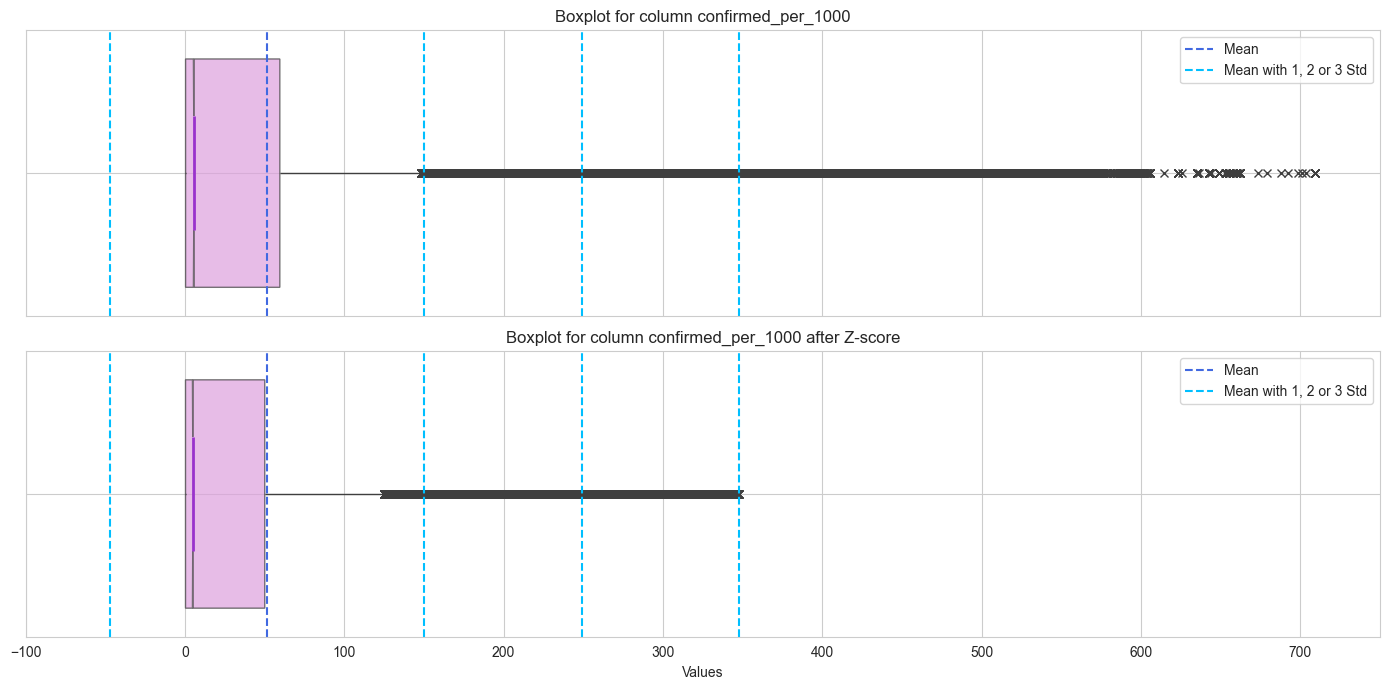

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(14, 7), sharex=True)

# First boxplot
sns.boxplot(x=df['confirmed_per_1000'], notch=True, showcaps=False, flierprops={"marker": "x"},
            boxprops={"facecolor": "plum", "alpha": 0.7},
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[0])

axes[0].axvline(x=df['confirmed_per_1000'].mean() - df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean - 1 Std')
axes[0].axvline(x=df['confirmed_per_1000'].mean(), color='royalblue', linestyle='--', label='Mean')
axes[0].axvline(x=df['confirmed_per_1000'].mean() + df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 1 Std')
axes[0].axvline(x=df['confirmed_per_1000'].mean() + 2 * df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 2 Std')
axes[0].axvline(x=df['confirmed_per_1000'].mean() + 3 * df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 3 Std')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['Mean', 'Mean with 1, 2 or 3 Std']
axes[0].legend(handles, labels)

axes[0].set_title("Boxplot for column confirmed_per_1000")
axes[0].set_xlim([-100, 750])
axes[0].set_xlabel("Values")
axes[0].grid(True)
axes[0].set_xscale("linear")

# Second boxplot
sns.boxplot(x=df_zscore_confirmed['confirmed_per_1000'], notch=True, showcaps=False, flierprops={"marker": "x"},
            boxprops={"facecolor": "plum", "alpha": 0.7},
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[1])

axes[1].axvline(x=df['confirmed_per_1000'].mean() - df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean - 1 Std')
axes[1].axvline(x=df['confirmed_per_1000'].mean(), color='royalblue', linestyle='--', label='Mean')
axes[1].axvline(x=df['confirmed_per_1000'].mean() + df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 1 Std')
axes[1].axvline(x=df['confirmed_per_1000'].mean() + 2 * df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 2 Std')
axes[1].axvline(x=df['confirmed_per_1000'].mean() + 3 * df['confirmed_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 3 Std')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['Mean', 'Mean with 1, 2 or 3 Std']
axes[1].legend(handles, labels)

axes[1].set_title("Boxplot for column confirmed_per_1000 after Z-score")
axes[1].set_xlim([-100, 750])
axes[1].set_xlabel("Values")
axes[1].grid(True)
axes[1].set_xscale("linear")

plt.tight_layout()
plt.show()

##### tested_per_1000

In [5]:
z_scores_tested = np.abs((df['tested_per_1000'] - df['tested_per_1000'].mean()) / df['tested_per_1000'].std())
outliers_mask_tested = z_scores_tested > 3
df_zscore_tested = df[~outliers_mask_tested].copy()
print(f"Number of outliers (Z-Score > 3) for tested_per_1000: {outliers_mask_tested.sum()}")

Number of outliers (Z-Score > 3) for tested_per_1000: 1531


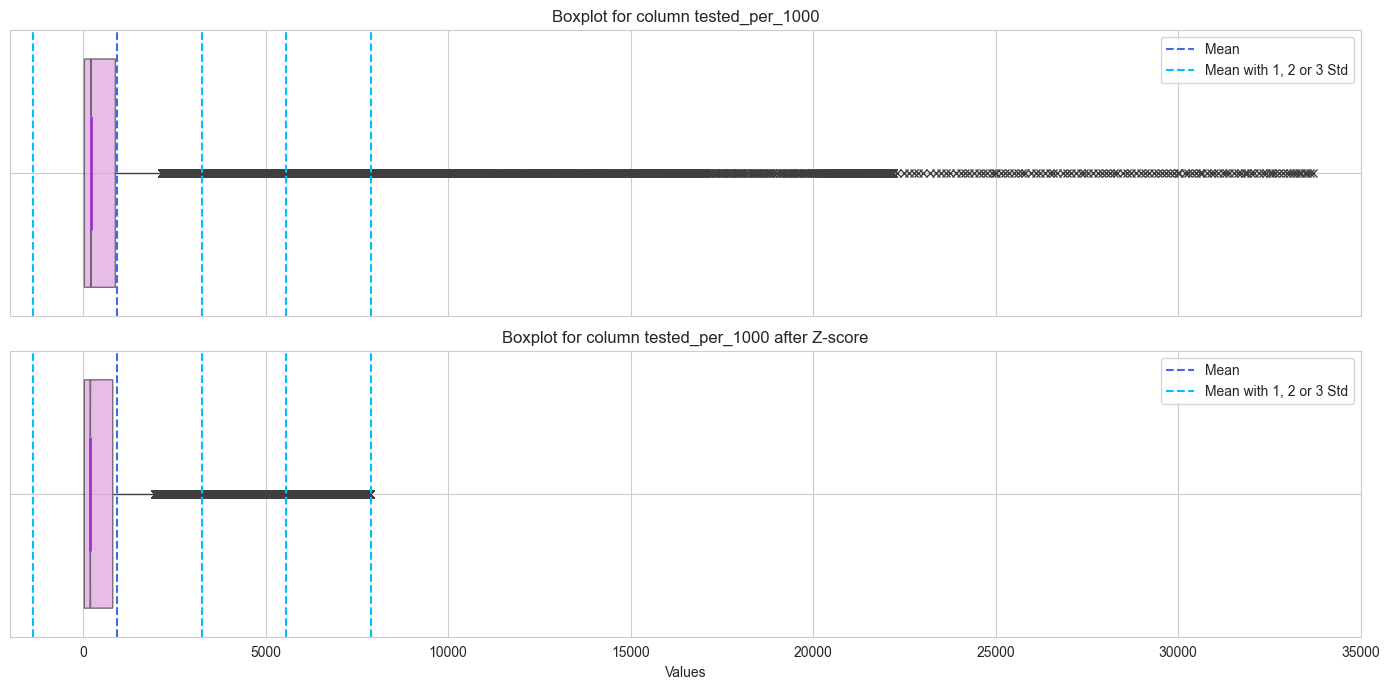

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(14, 7), sharex=True)

# First boxplot
sns.boxplot(x=df['tested_per_1000'], notch=True, showcaps=False, 
            flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, 
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[0])

axes[0].axvline(x=df['tested_per_1000'].mean() - df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean - 1 Std')
axes[0].axvline(x=df['tested_per_1000'].mean(), color='royalblue', linestyle='--', label='Mean')
axes[0].axvline(x=df['tested_per_1000'].mean() + df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 1 Std')
axes[0].axvline(x=df['tested_per_1000'].mean() + 2 * df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 2 Std')
axes[0].axvline(x=df['tested_per_1000'].mean() + 3 * df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 3 Std')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['Mean', 'Mean with 1, 2 or 3 Std']
axes[0].legend(handles, labels)

axes[0].set_title("Boxplot for column tested_per_1000")
axes[0].set_xlim([-2000, 35000])
axes[0].set_xlabel("Values")
axes[0].grid(True)
axes[0].set_xscale("linear")

# Second boxplot
sns.boxplot(x=df_zscore_tested['tested_per_1000'], notch=True, showcaps=False, flierprops={"marker": "x"}, 
            boxprops={"facecolor": "plum", "alpha": 0.7},
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[1])

axes[1].axvline(x=df['tested_per_1000'].mean() - df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean - 1 Std')
axes[1].axvline(x=df['tested_per_1000'].mean(), color='royalblue', linestyle='--', label='Mean')
axes[1].axvline(x=df['tested_per_1000'].mean() + df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 1 Std')
axes[1].axvline(x=df['tested_per_1000'].mean() + 2 * df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 2 Std')
axes[1].axvline(x=df['tested_per_1000'].mean() + 3 * df['tested_per_1000'].std(), color='deepskyblue', linestyle='--', label='Mean + 3 Std')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['Mean', 'Mean with 1, 2 or 3 Std']
axes[1].legend(handles, labels)

axes[1].set_title("Boxplot for column tested_per_1000 after Z-score")
axes[1].set_xlim([-2000, 35000])
axes[1].set_xlabel("Values")
axes[1].grid(True)
axes[1].set_xscale("linear")

plt.tight_layout()
plt.show()

#### Metoda IQR (ang. InterQuartile Range)
##### Technika oparta na kwartylach, w której oblicza się zakres międzykwartylowy (Q3 - Q1) i wartości odstające są określane jako wartości leżące poza granicami 1,5 IQR poniżej Q1 lub powyżej Q3. 

##### confirmed_per_1000

In [7]:
Q1_confirmed = df['confirmed_per_1000'].quantile(0.25)
Q3_confirmed = df['confirmed_per_1000'].quantile(0.75)
IQR_confirmed = Q3_confirmed - Q1_confirmed
lower_bound_confirmed = Q1_confirmed - 1.5 * IQR_confirmed
upper_bound_confirmed = Q3_confirmed + 1.5 * IQR_confirmed
outliers_mask_confirmed = (df['confirmed_per_1000'] < lower_bound_confirmed) | (df['confirmed_per_1000'] > upper_bound_confirmed)
df_no_outliers_iqr = df[~outliers_mask_confirmed].copy()
print(f"Number of outliers (IQR method) for column confirmed_per_1000: {outliers_mask_confirmed.sum()}")

Number of outliers (IQR method) for column confirmed_per_1000: 23752


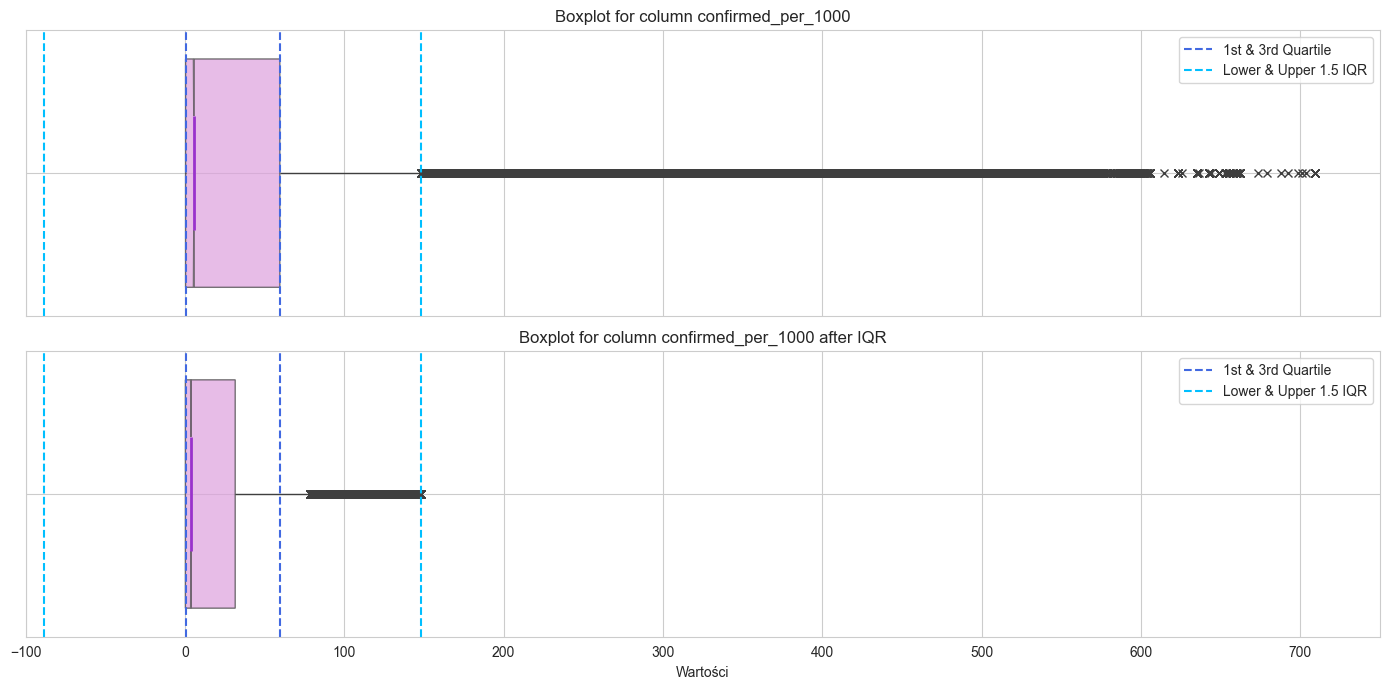

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(14, 7), sharex=True)

# First boxplot (top)
sns.boxplot(x=df['confirmed_per_1000'], notch=True, showcaps=False, flierprops={"marker": "x"}, 
            boxprops={"facecolor": "plum", "alpha": 0.7}, 
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[0])

axes[0].axvline(x=lower_bound_confirmed, color='deepskyblue', linestyle='--', label='-1.5 IQR')
axes[0].axvline(x=Q1_confirmed, color='royalblue', linestyle='--', label='1st Quartile')
axes[0].axvline(x=Q3_confirmed, color='royalblue', linestyle='--', label='3rd Quartile')
axes[0].axvline(x=upper_bound_confirmed, color='deepskyblue', linestyle='--', label='1.5 IQR')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['1st & 3rd Quartile', 'Lower & Upper 1.5 IQR']
axes[0].legend(handles, labels)

axes[0].set_title("Boxplot for column confirmed_per_1000")
axes[0].set_xlim([-100, 750])
axes[0].set_xlabel("Wartości")
axes[0].grid(True)
axes[0].set_xscale("linear")

# Second boxplot (bottom)
sns.boxplot(x=df_no_outliers_iqr['confirmed_per_1000'], notch=True, showcaps=False, flierprops={"marker": "x"}, 
            boxprops={"facecolor": "plum", "alpha": 0.7}, 
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[1])

axes[1].axvline(x=lower_bound_confirmed, color='deepskyblue', linestyle='--', label='-1.5 IQR')
axes[1].axvline(x=Q1_confirmed, color='royalblue', linestyle='--', label='1st Quartile')
axes[1].axvline(x=Q3_confirmed, color='royalblue', linestyle='--', label='3rd Quartile')
axes[1].axvline(x=upper_bound_confirmed, color='deepskyblue', linestyle='--', label='1.5 IQR')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['1st & 3rd Quartile', 'Lower & Upper 1.5 IQR']
axes[1].legend(handles, labels)

axes[1].set_title("Boxplot for column confirmed_per_1000 after IQR")
axes[1].set_xlim([-100, 750])
axes[1].set_xlabel("Wartości")
axes[1].grid(True)
axes[1].set_xscale("linear")


plt.tight_layout()
plt.show()

##### tested_per_1000

In [9]:
Q1_tested = df['tested_per_1000'].quantile(0.25)
Q3_tested = df['tested_per_1000'].quantile(0.75)
IQR_tested = Q3_tested - Q1_tested
lower_bound_tested = Q1_tested - 1.5 * IQR_tested
upper_bound_tested = Q3_tested + 1.5 * IQR_tested
outliers_mask_deceased = (df['tested_per_1000'] < lower_bound_tested) | (df['tested_per_1000'] > upper_bound_tested)
df_no_outliers_iqr = df[~outliers_mask_deceased].copy()
print(f"Number of outliers (IQR method) for column tested_per_1000: {outliers_mask_deceased.sum()}")

Number of outliers (IQR method) for column tested_per_1000: 8480


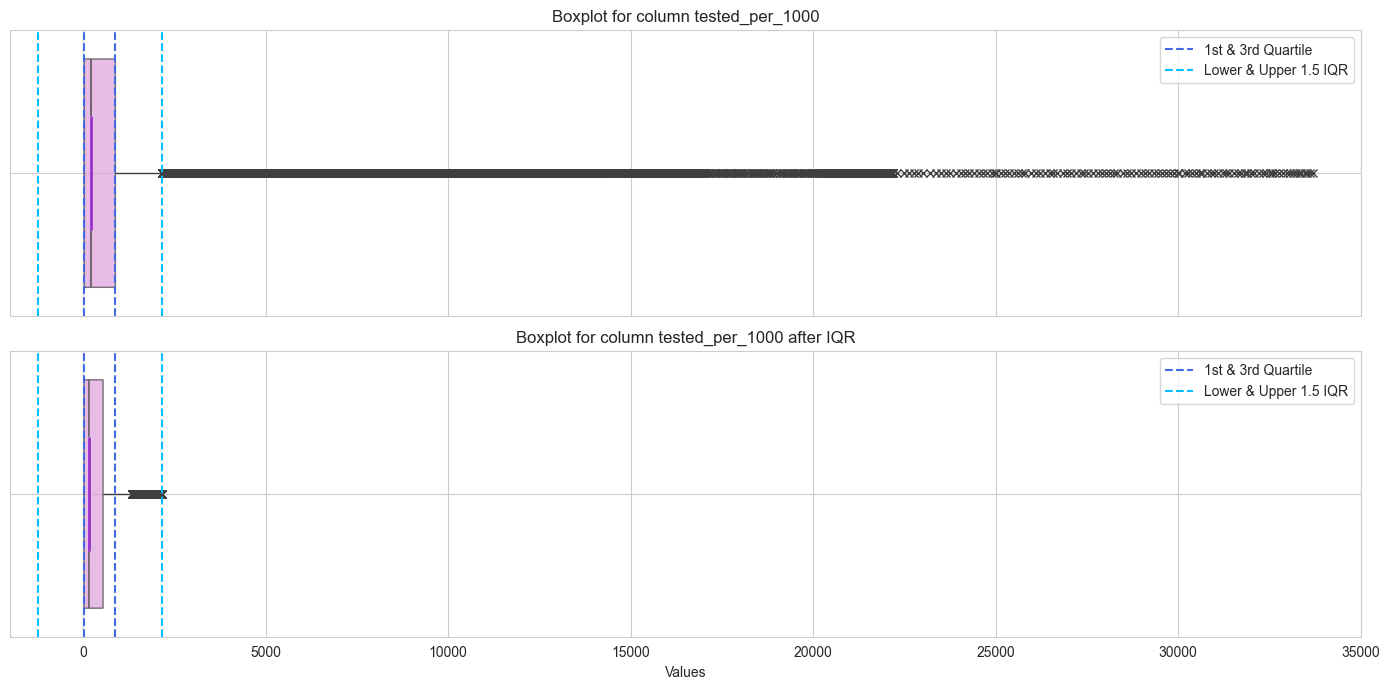

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(14, 7), sharex=True)

# First boxplot (top)
sns.boxplot(x=df['tested_per_1000'], notch=True, showcaps=False, flierprops={"marker": "x"}, 
            boxprops={"facecolor": "plum", "alpha": 0.7}, 
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[0])

axes[0].axvline(x=lower_bound_tested, color='deepskyblue', linestyle='--', label='-1.5 IQR')
axes[0].axvline(x=Q1_tested, color='royalblue', linestyle='--', label='1st Quartile')
axes[0].axvline(x=Q3_tested, color='royalblue', linestyle='--', label='3rd Quartile')
axes[0].axvline(x=upper_bound_tested, color='deepskyblue', linestyle='--', label='+1.5 IQR')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['1st & 3rd Quartile', 'Lower & Upper 1.5 IQR']
axes[0].legend(handles, labels)

axes[0].set_title("Boxplot for column tested_per_1000")
axes[0].set_xlim([-2000, 35000])
axes[0].set_xlabel("Values")
axes[0].grid(True)
axes[0].set_xscale("linear")

# Second boxplot (bottom)
sns.boxplot(x=df_no_outliers_iqr['tested_per_1000'], notch=True, showcaps=False, flierprops={"marker": "x"}, 
            boxprops={"facecolor": "plum", "alpha": 0.7}, 
            medianprops={"color": "darkorchid", "linewidth": 2}, ax=axes[1])

axes[1].axvline(x=lower_bound_tested, color='deepskyblue', linestyle='--', label='-1.5 IQR')
axes[1].axvline(x=Q1_tested, color='royalblue', linestyle='--', label='1st Quartile')
axes[1].axvline(x=Q3_tested, color='royalblue', linestyle='--', label='3rd Quartile')
axes[1].axvline(x=upper_bound_tested, color='deepskyblue', linestyle='--', label='+1.5 IQR')

handles = [
    plt.Line2D([], [], color='royalblue', linestyle='--'),
    plt.Line2D([], [], color='deepskyblue', linestyle='--')
]
labels = ['1st & 3rd Quartile', 'Lower & Upper 1.5 IQR']
axes[1].legend(handles, labels)

axes[1].set_title("Boxplot for column tested_per_1000 after IQR")
axes[1].set_xlim([-2000, 35000])
axes[1].set_xlabel("Values")
axes[1].grid(True)
axes[1].set_xscale("linear")

plt.tight_layout()
plt.show()